# **Universidad Galileo**
# **Postgrado en Análisis y Predicción de Datos** - *Tercer Trimestre 2024*
# **Curso:** Text Mining and Image Recognition
# **Alumno:** Elder Cruz. **Carnet:** 23004456
# **Laboratorio:** *#2*


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### **Problema 1**
#### Desarrolle una función que permita hacer la *binarización* de una imagen, para realizarlo, puede utilizar el enfoque que prefiera.

##### **1.1 Carga de imagen**

In [3]:
img = cv2.imread("Guatemala.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Conversion de imagen a RBG

In [4]:
img.shape #dimension alto, ancho y "profundidad" (canales de pixel)

(2000, 3008, 3)

#### **1.2 Mostrar imagen**

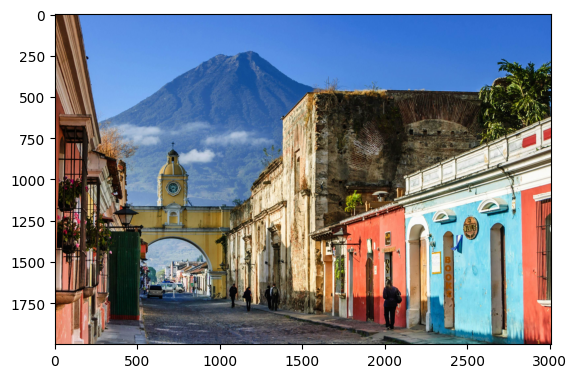

In [5]:
plt.imshow(img)
plt.show()

#### **1.3 Función para binarizar**

(np.float64(-0.5), np.float64(3007.5), np.float64(1999.5), np.float64(-0.5))

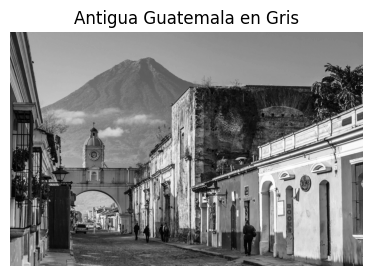

In [6]:
imgGris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Antigua Guatemala en Gris")
plt.imshow(imgGris, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(3007.5), np.float64(1999.5), np.float64(-0.5))

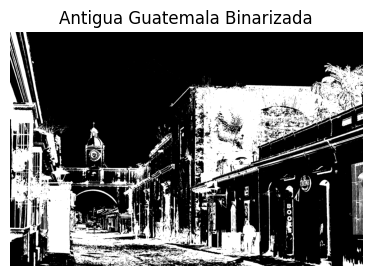

In [7]:
umbral = 85
mascara = np.uint8((imgGris<umbral)*255)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Antigua Guatemala Binarizada")
plt.imshow(mascara, cmap='gray')
plt.axis('off')

### **Problema 2**
#### Desarrolle una función que dada dos imagenes que usted desee del mismo tamaño (igual ancho y alto) y a color, realice las operaciones *SUMA, RESTA, AND, OR, XOR* con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla   

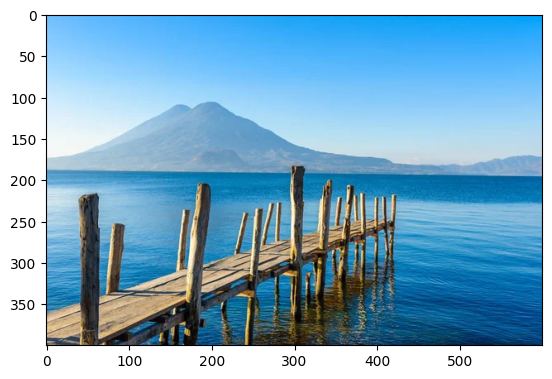

In [40]:
#Importacion imagen 1
img1 = cv2.imread("Panajachel_600x400.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) #Conversion de imagen a RBG
plt.imshow(img1)
plt.show()

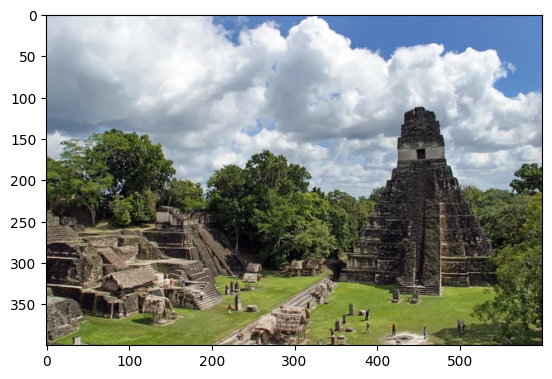

In [10]:
#Importacion imagen 2
img2 = cv2.imread("Peten_600x400.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) #Conversion de imagen a RBG
plt.imshow(img2)
plt.show()

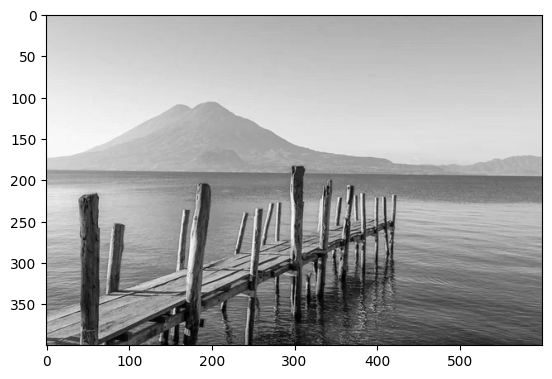

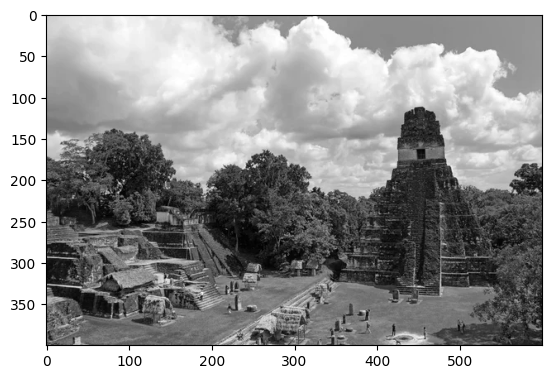

In [44]:
#Conversión de imagen a Gris

img1Gris = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2Gris = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 

plt.imshow(img1Gris, cmap= 'gray')
plt.show()

plt.imshow(img2Gris, cmap= 'gray')
plt.show()

#### **Función**

In [45]:
def procesar_imagenes(ruta_imagen1, ruta_imagen2, umbral=128):
    # Cargar las imágenes en escala de grises
    imagen1_gris = img1Gris
    imagen2_gris = img2Gris
    
    # Verificar que las imágenes se hayan cargado correctamente
    if imagen1_gris is None or imagen2_gris is None:
        raise ValueError("No se pudo cargar una o ambas imágenes. Verifique las rutas de los archivos.")
    
    # Binarizar las imágenes
    _, imagen1_bin = cv2.threshold(imagen1_gris, umbral, 255, cv2.THRESH_BINARY)
    _, imagen2_bin = cv2.threshold(imagen2_gris, umbral, 255, cv2.THRESH_BINARY)
    
    # Operaciones entre las imágenes
    suma = cv2.add(imagen1_bin, imagen2_bin)
    resta = cv2.subtract(imagen1_bin, imagen2_bin)
    and_op = cv2.bitwise_and(imagen1_bin, imagen2_bin)
    or_op = cv2.bitwise_or(imagen1_bin, imagen2_bin)
    xor_op = cv2.bitwise_xor(imagen1_bin, imagen2_bin)
    
    return suma, resta, and_op, or_op, xor_op

In [46]:

suma, resta, and_op, or_op, xor_op = procesar_imagenes(img1Gris, img2Gris)

#### **Resultado Suma**

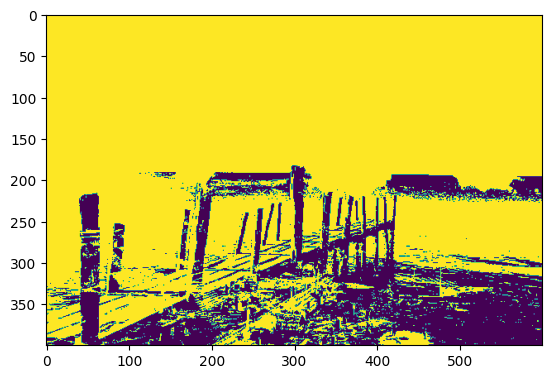

In [47]:
plt.imshow(suma)
plt.show()

#### **Resultado Resta**

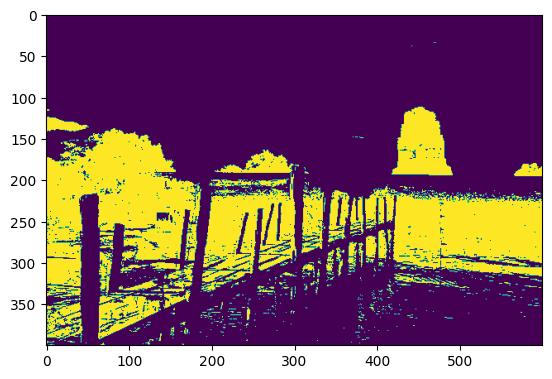

In [48]:
plt.imshow(resta)
plt.show()

#### **Resultado AND**

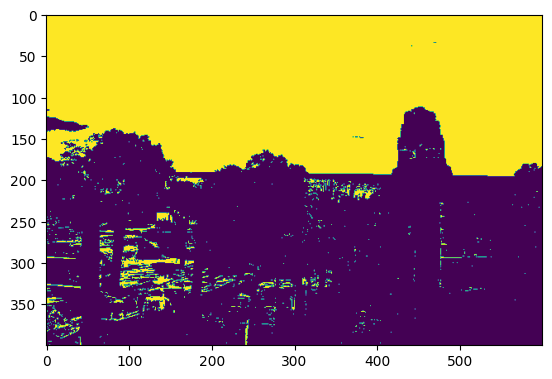

In [49]:
plt.imshow(and_op)
plt.show()

#### **Resultado OR**

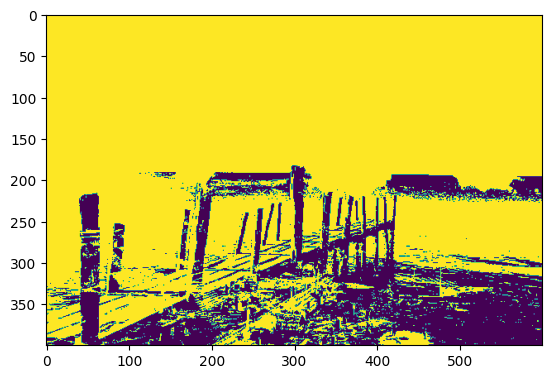

In [50]:
plt.imshow(or_op)
plt.show()

#### **Resultado XOR**

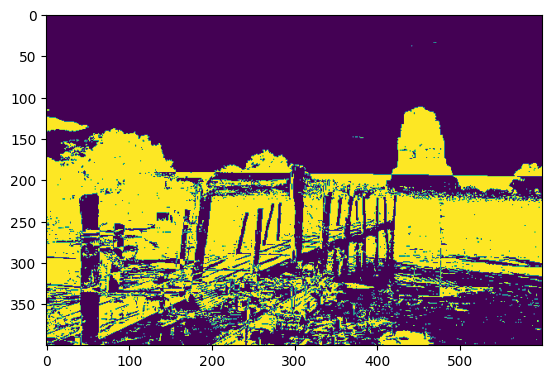

In [51]:
plt.imshow(xor_op)
plt.show()

### **Problema 3**
#### Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris en cada pixel

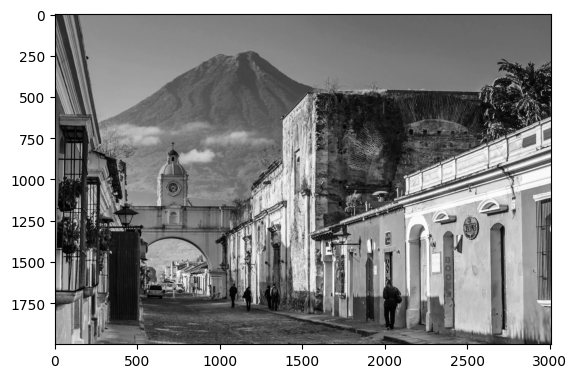

In [53]:
img4 = cv2.imread("Guatemala_gray.jpg")
plt.imshow(img4)
plt.show()

In [58]:
alto, ancho = img4.shape[:2]

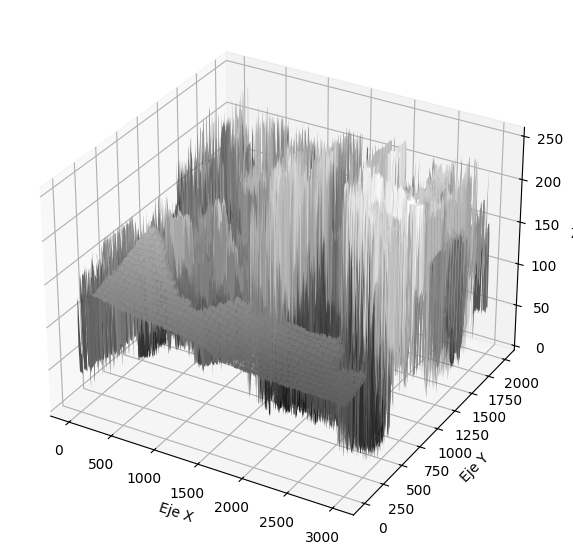

In [61]:
# Cargar la imagen en escala de grises
ruta_imagen = 'Guatemala_gray.jpg'
imagen_gris = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Obtener las dimensiones de la imagen
alto, ancho = imagen_gris.shape

# Crear las mallas de coordenadas X e Y
X, Y = np.meshgrid(np.arange(ancho), np.arange(alto))

# Crear la figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie utilizando la imagen en escala de grises como Z
ax.plot_surface(X, Y, imagen_gris, cmap='gray')

# Etiquetar los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Z')

# Mostrar la gráfica
plt.show()


### **Problema 4**
#### Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial

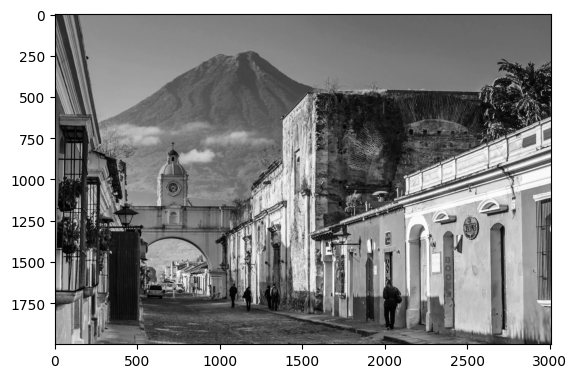

In [62]:
#Usando imagen de antigua Guatemala en gris
img4 = cv2.imread("Guatemala_gray.jpg")
plt.imshow(img4)
plt.show()


#### **Transformación negativa**

In [63]:
def transformar_negativa(img4):
    return 255 - img4

(<Axes: title={'center': 'Negativa'}>,
 Text(0.5, 1.0, 'Negativa'))

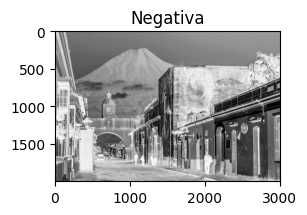

In [66]:
imagen_negativa = transformar_negativa(img4)
plt.subplot(221), plt.imshow(imagen_negativa, cmap='gray'), plt.title('Negativa')

#### **Transformación lineal**

In [67]:
def transformar_lineal(img4, c=1.0):
    imagen_lineal = c * img4
    return np.clip(imagen_lineal, 0, 255).astype(np.uint8)

(<Axes: title={'center': 'Lineal'}>,
 Text(0.5, 1.0, 'Lineal'))

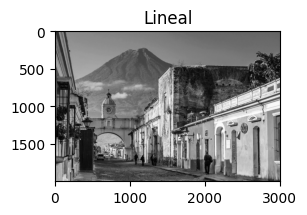

In [68]:
imagen_lineal = transformar_lineal(img4)
plt.subplot(221), plt.imshow(imagen_lineal, cmap='gray'), plt.title('Lineal')

#### **Transformación logarítmica**

In [69]:
def transformar_logaritmica(img4, c=1.0):
    imagen_log = c * np.log1p(img4)
    return np.clip(imagen_log * (255 / np.max(imagen_log)), 0, 255).astype(np.uint8)


(<Axes: title={'center': 'Logaritmica'}>,
 Text(0.5, 1.0, 'Logaritmica'))

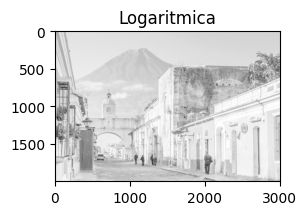

In [70]:
imagen_logaritmica = transformar_logaritmica(img4)
plt.subplot(221), plt.imshow(imagen_logaritmica, cmap='gray'), plt.title('Logaritmica')

#### **Transformación Exponencial**

In [72]:
def transformar_exponencial(img4, c=1.0, gamma=1.0):
    imagen_exp = c * np.power(img4, gamma)
    return np.clip(imagen_exp * (255 / np.max(imagen_exp)), 0, 255).astype(np.uint8)

(<Axes: title={'center': 'Exponencial'}>,
 Text(0.5, 1.0, 'Exponencial'))

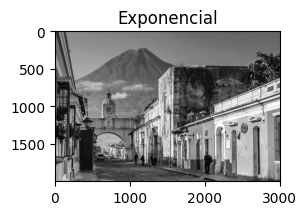

In [74]:
imagen_exp = transformar_exponencial(img4)
plt.subplot(221), plt.imshow(imagen_exp, cmap='gray'), plt.title('Exponencial')

### **Problema 5**
#### Investigue qué hace el kernel Laplaceano y cómo este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

#### **Kernel Laplaciano**
#### es una técnica de procesamiento de imágenes que se utiliza para la detección de bordes. Se basa en la *segunda derivada de la imagen*, lo que significa que identifica los puntos donde *la tasa de cambio de intensidad (es decir, el borde) es máxima*. A diferencia de los métodos basados en la primera derivada, como el operador Sobel, el Laplaciano detecta bordes donde hay cambios rápidos de intensidad en todas las direcciones.

#### El *algoritmo de Canny* es una técnica más sofisticada para la detección de bordes que se basa en varios pasos tales como reducción de ruido, cálculo del gradiente de la imagen, supresión no máxima y umbralización con histéresis.

#### Se *diferencia* en que *Laplaciano* utiliza la segunda derivada para detectar bordes, lo que lo hace sensible a cambios rápidos de intensidad, mientras que *Canny* utiliza la primera derivada para encontrar bordes, seguido de técnicas adicionales para mejorar la precisión.  *Laplaciano* es más sensible al ruido porque no incluye un paso de suavizado antes de la detección de bordes.